# AbdolazizsalimiFinal980292626

## About DataSet:

### Abstract: 


Contrast-enhanced spectral mammography (CESM) is a relatively recent imaging modality with increased diagnostic accuracy compared to digital mammography (DM). New deep learning (DL) models were developed that have accuracies equal to that of an average radiologist. However, most studies trained the DL models on DM images as no datasets exist for CESM images. We aim to resolve this limitation by releasing a Categorized Digital Database for Low energy and Subtracted Contrast Enhanced Spectral Mammography images (CDD-CESM) to evaluate decision support systems. The dataset includes 2006 images, with an average resolution of 2355 × 1315, consisting of 310 mass images, 48 architectural distortion images, 222 asymmetry images, 238 calcifications images, 334 mass enhancement images, 184 non-mass enhancement images, 159 postoperative images, 8 post neoadjuvant chemotherapy images, and 751 normal images, with 248 images having more than one finding. This is the first dataset to incorporate data selection, segmentation annotation, medical reports, and pathological diagnosis for all cases. Moreover, we propose and evaluate a DL-based technique to automatically segment abnormal findings in images.

![a:Low-energy | b:High-energy | c:subtracted-Image](Lowenergy-Highenergy-Sub.png)


* (a) :Low-energy 
* (b) :High-energy
* (c) :subtracted-Image

### import dependency

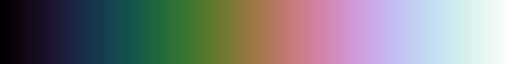

In [141]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
from tqdm.notebook import tqdm
from os import listdir

sns.color_palette("cubehelix", as_cmap=True)

In [142]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### load Radiology manual file :

In [143]:
path = r'../Radiology-manual-annotations.xlsx'
manual = pd.read_excel(path)

In [144]:
df = manual.copy()

In [145]:
#drop DM type 
#dont have image sample
df = df[df['Type'] != 'DM']

In [146]:
df.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,Pathology Classification/ Follow up
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign
5,P2_R_CM_MLO,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,MLO,"benign, masses, homogenous",2,Benign
8,P2_L_CM_CC,2,L,CESM,31,_,2,Flap with no enhancement,CC,"flap, benign",2,Benign
9,P2_L_CM_MLO,2,L,CESM,31,_,2,Flap with no enhancement,MLO,"flap, benign",2,Benign


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 1 to 2005
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Image_name                           1003 non-null   object
 1   Patient_ID                           1003 non-null   int64 
 2   Side                                 1003 non-null   object
 3   Type                                 1003 non-null   object
 4   Age                                  1003 non-null   int64 
 5   Breast density (ACR)                 1003 non-null   object
 6   BIRADS                               1003 non-null   object
 7   Findings                             1003 non-null   object
 8   View                                 1003 non-null   object
 9   Tags                                 1003 non-null   object
 10  Machine                              1003 non-null   int64 
 11  Pathology Classification/ Follow up  1003 n

In [148]:
df.isnull().sum()

Image_name                             0
Patient_ID                             0
Side                                   0
Type                                   0
Age                                    0
Breast density (ACR)                   0
BIRADS                                 0
Findings                               0
View                                   0
Tags                                   0
Machine                                0
Pathology Classification/ Follow up    0
dtype: int64

In [149]:
# Rename the column
df.rename(columns={'Pathology Classification/ Follow up': 'PathologyClassification'}, inplace=True)

In [150]:
df.columns

Index(['Image_name', 'Patient_ID', 'Side', 'Type', 'Age',
       'Breast density (ACR)', 'BIRADS', 'Findings', 'View', 'Tags', 'Machine',
       'PathologyClassification'],
      dtype='object')

In [151]:
df['PathologyClassification'].value_counts()

Normal       416
Malignant    331
Benign       256
Name: PathologyClassification, dtype: int64

In [152]:
labels = df['PathologyClassification'].unique()
total_case = df['PathologyClassification'].count()
normal_case = df[df['PathologyClassification'] == 'Normal']
benign_case = df[df['PathologyClassification'] == 'Benign']
malignant_case = df[df['PathologyClassification'] == 'Malignant']

print(f"Labels: {labels}")
print(f"Total Cases: {total_case}")
print(f"Normal Cases: {len(normal_case)}")
print(f"Benign Cases: {len(benign_case)}")
print(f"Malignant Cases: {len(malignant_case)}")

Labels: ['Malignant' 'Benign' 'Normal']
Total Cases: 1003
Normal Cases: 416
Benign Cases: 256
Malignant Cases: 331


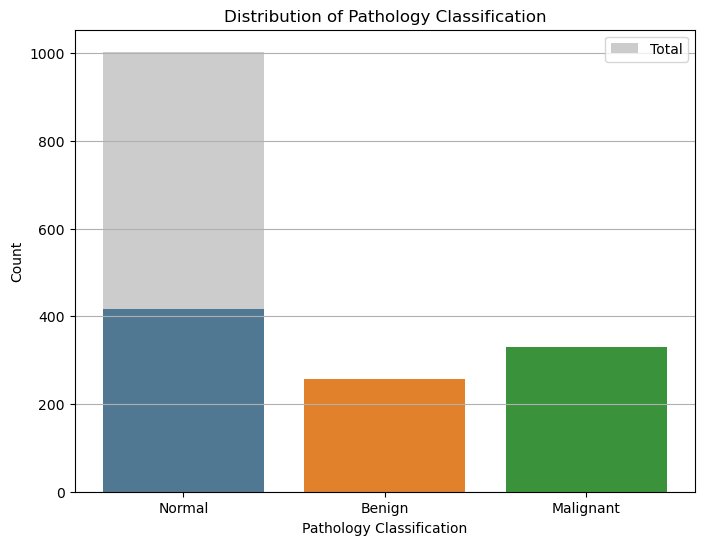

In [153]:

labels = ['Normal', 'Benign', 'Malignant']
counts = [len(normal_case), len(benign_case), len(malignant_case)]

plt.figure(figsize=(8, 6)) 
sns.barplot(x=labels, y=counts)
plt.bar(labels, [total_case, 0, 0], color='gray', alpha=0.4, label='Total')

plt.title('Distribution of Pathology Classification')
plt.xlabel('Pathology Classification')
plt.ylabel('Count')
plt.grid(True ,axis='y' )
plt.legend()
plt.show()

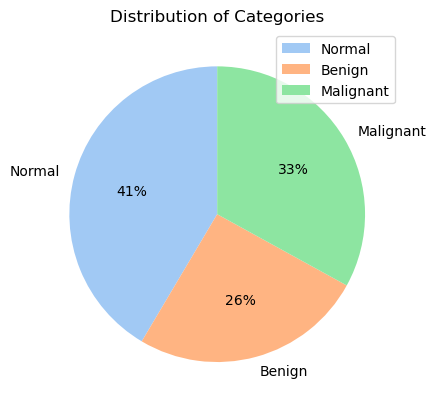

In [154]:
colors = sns.color_palette('pastel')[0:3]
plt.pie(counts, labels=labels, autopct='%.0f%%', startangle=90, colors=colors )
plt.title("Distribution of Categories")
plt.legend(loc='best')
plt.show()

## pre-processing



In [155]:
path = r'../Subtracted images of CDD-CESM/'
Imagefile = listdir(path)
firstImage = Imagefile[0]
lastImage = Imagefile[-1]

In [156]:
print(f"First Image: {firstImage}")
print(f"Last Image: {lastImage}")
print(f'total of the Image: {len(Imagefile)}')

First Image: P100_L_CM_CC.jpg
Last Image: P9_L_CM_MLO.jpg
total of the Image: 1003


In [157]:
df_sorted_by_Image_name = df.sort_values(by='Image_name')
Image_labels = df_sorted_by_Image_name[['Image_name','PathologyClassification']]

In [158]:
Image_labels.head()

,Image_name,PathologyClassification
556,P100_L_CM_CC,Benign
557,P100_L_CM_MLO,Benign
552,P100_R_CM_CC,Normal
553,P100_R_CM_MLO,Normal
564,P101_L_CM_CC,Normal


In [159]:
Image_labels['CategoryCode'] = Image_labels['PathologyClassification'].astype('category').cat.codes

c:\Users\Parseh\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [160]:
Image_labels.head()

,Image_name,PathologyClassification,CategoryCode
556,P100_L_CM_CC,Benign,0
557,P100_L_CM_MLO,Benign,0
552,P100_R_CM_CC,Normal,2
553,P100_R_CM_MLO,Normal,2
564,P101_L_CM_CC,Normal,2


In [161]:
Image_labels.to_csv('Image_labels.csv' , index=False)

### Image pre-processing 

In [162]:
import os 
from skimage import transform
import imageio

In [163]:
image_df = pd.read_csv('Image_labels.csv')

In [164]:
image_df.head()

,Image_name,PathologyClassification,CategoryCode
0,P100_L_CM_CC,Benign,0
1,P100_L_CM_MLO,Benign,0
2,P100_R_CM_CC,Normal,2
3,P100_R_CM_MLO,Normal,2
4,P101_L_CM_CC,Normal,2


In [165]:
image_directory = '../Subtracted images of CDD-CESM/'
files = os.listdir(image_directory)
file = files[3]
file_path = os.path.join(image_directory, file)
mri_image = imageio.imread(file_path)
output_size = (512, 512)  # Example: resizing to (512,512)
resized_image = transform.resize(mri_image, output_size)

In [166]:

print(f"mri_image shape: {mri_image.shape}")
print(f"resized_image shape: {resized_image.shape}")


mri_image shape: (2459, 1523, 3)
resized_image shape: (512, 512, 3)


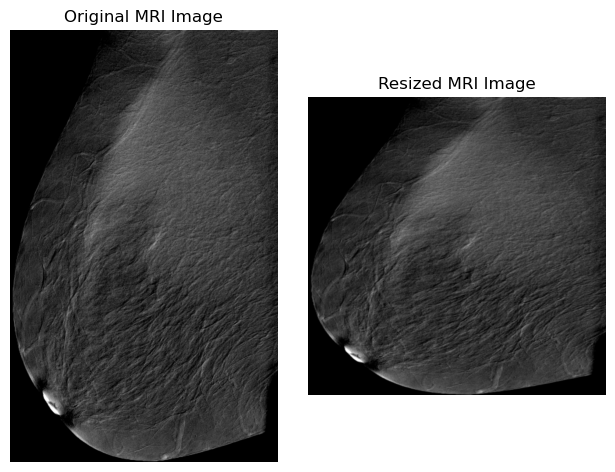

In [167]:

plt.subplot(1, 2, 1)
plt.imshow(mri_image)
plt.title('Original MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Resized MRI Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Resize the image using transformer

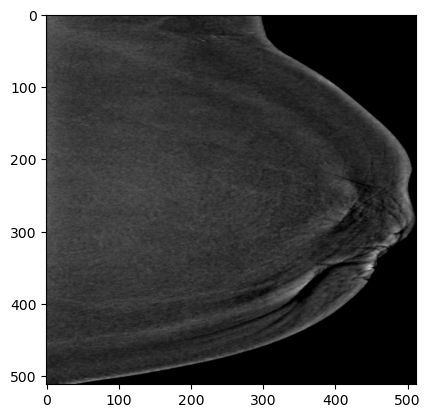

In [168]:
image_path = r'Images/'
plt.imshow(plt.imread(image_path+'/P2_L_CM_MLO.png'))


In [169]:
len(os.listdir(image_path))



1003

In [170]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

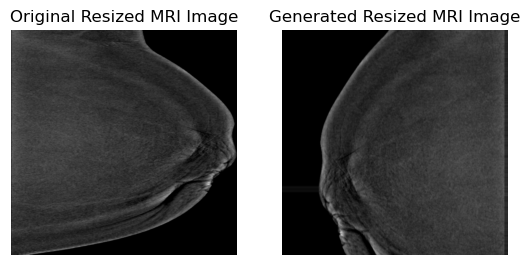

In [171]:
imggen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1,
                           shear_range = 0.1, zoom_range = 0.5, horizontal_flip =True,
                           fill_mode = 'nearest')

plt.subplot(1, 2, 1)
plt.title('Original Resized MRI Image')
plt.axis('off')
plt.imshow(plt.imread(image_path+'/P2_L_CM_MLO.png'))
plt.subplot(1, 2, 2)
plt.title('Generated Resized MRI Image')
plt.axis('off')
plt.imshow(imggen.random_transform(plt.imread(image_path+'/P2_L_CM_MLO.png')))